In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv ('/Users/zahiramohammed/Desktop/DAPM_clean.csv')


In [3]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_scaled,age_discretized,glucose_discretized
0,1,35.0,0,0,0,23.47,6.6,90,0,-0.686567,1,0
1,1,54.0,0,0,1,22.40,3.5,100,0,-0.847830,2,1


In [4]:
X = data[['age_discretized', 'bmi_scaled','glucose_discretized']]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Fit_transform scales the features to have mean 0 and variance 1
number_of_clusters = 4
#AgglomerativeClustering model is created using ward linkage and number of clusters set previously
agg_clustering = AgglomerativeClustering(n_clusters=number_of_clusters)
cluster_labels = agg_clustering.fit_predict(X_scaled)

Cluster Statistics:
   Cluster    gender        age  hypertension  heart_disease  smoking_history  \
0        0  0.514706  43.058824      0.036765       0.051471        -0.154412   
1        1  0.580000  47.800000      0.120000       0.050000        -0.410000   
2        2  0.641026  21.433846      0.017094       0.000000         0.059829   
3        3  0.646259  58.455782      0.115646       0.047619        -0.088435   

         bmi  HbA1c_level  blood_glucose_level  diabetes  bmi_scaled  \
0  26.799265     5.333088            88.088235  0.000000   -0.184804   
1  37.027100     5.654000           158.930000  0.230000    1.356664   
2  23.428205     5.300000           150.709402  0.034188   -0.692866   
3  26.695374     5.619048           160.455782  0.156463   -0.200461   

   age_discretized  glucose_discretized  
0         1.610294             0.235294  
1         1.840000             2.000000  
2         0.598291             1.957265  
3         2.319728             2.000000  


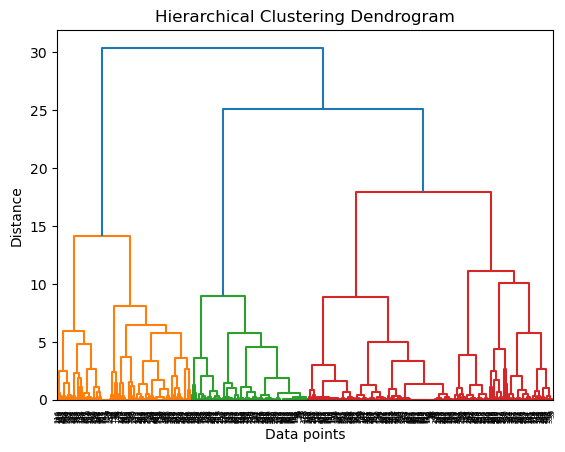

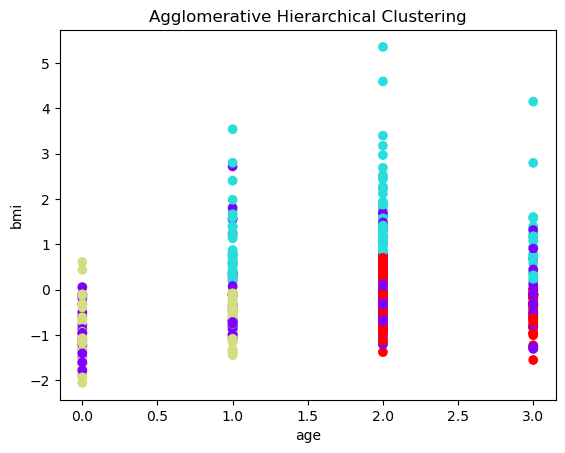

In [7]:
data['Cluster'] = cluster_labels
cluster_stats = data.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)


linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix) #Dendrogram visualizes the heirarchical clustering steps and distances between clusters at each step
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()
#Scatter plot colors data points by cluster label to visualize clustering results on original data
plt.scatter(X['age_discretized'], X['bmi_scaled'], c=cluster_labels, cmap='rainbow')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

Cluster Statistics:
   Cluster    gender        age  hypertension  heart_disease  smoking_history  \
0        0  0.619433  54.141700      0.117409       0.048583        -0.218623   
1        1  0.514706  43.058824      0.036765       0.051471        -0.154412   
2        2  0.641026  21.433846      0.017094       0.000000         0.059829   

         bmi  HbA1c_level  blood_glucose_level  diabetes  bmi_scaled  \
0  30.878259     5.633198           159.838057  0.186235    0.429954   
1  26.799265     5.333088            88.088235  0.000000   -0.184804   
2  23.428205     5.300000           150.709402  0.034188   -0.692866   

   age_discretized  glucose_discretized  
0         2.125506             2.000000  
1         1.610294             0.235294  
2         0.598291             1.957265  


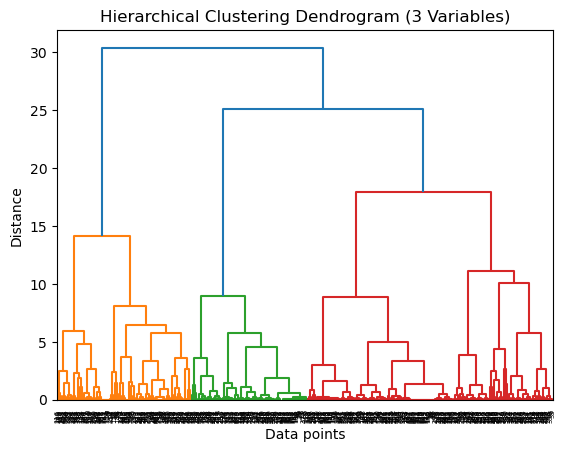

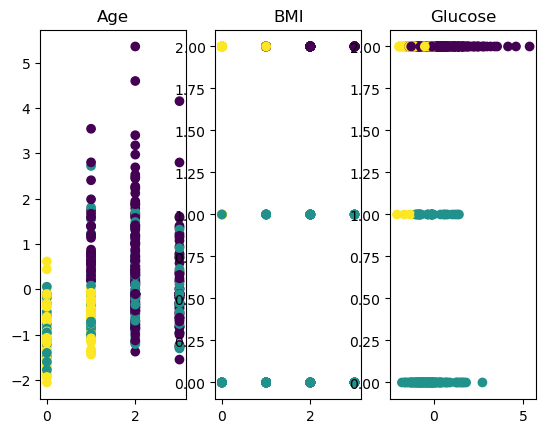

In [8]:

# Clustering variables
X = data[['age_discretized', 'bmi_scaled', 'glucose_discretized']] 

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster scaled data 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3) 
cluster.fit(X_scaled)
cluster_labels = cluster.labels_

# Add cluster label to dataset
data['Cluster'] = cluster_labels  

# Cluster statistics
cluster_stats = data.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)

# Dendrogram
from scipy.cluster.hierarchy import linkage
linkage_matrix = linkage(X_scaled, method='ward') 
dendrogram(linkage_matrix, labels=data.index)  
plt.title('Hierarchical Clustering Dendrogram (3 Variables)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Scatter plots
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Age')
ax1.scatter(data['age_discretized'], data['bmi_scaled'], c=cluster_labels)

ax2 = fig.add_subplot(1,3,2) 
ax2.set_title('BMI')
ax2.scatter(data['age_discretized'], data['glucose_discretized'], c=cluster_labels)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Glucose')  
ax3.scatter(data['bmi_scaled'], data['glucose_discretized'], c=cluster_labels)
plt.show()
